In [15]:
# Binary and categorical data

dfw <- read.csv(file='data/dfw_airline.csv')
sp500_px <- read.csv('data/sp500_px.csv')
sp500_sym <- read.csv('data/sp500_sym.csv', stringsAsFactors = FALSE)
kc_tax <- read.csv('data/kc_tax.csv')
airline_stats <- read.csv('data/airline_stats.csv')
head(dfw, n=3)
head(sp500_px, n=3)
head(sp500_sym, n=3)
head(kc_tax, n=3)
head(airline_stats, n=3)

Carrier  ATC     Weather  Security Inbound 
1 64263.16 84856.5 11235.42 343.15   118427.8

X          ADS CA          MSFT        RHT CTSH CSC         EMC        
1 1993-01-29 0    0.06012444 -0.02209982 0   0     0.01889746 0.007368072
2 1993-02-01 0   -0.18038896  0.02762115 0   0     0.01888884 0.018424887
3 1993-02-02 0   -0.12025659  0.03589987 0   0    -0.07557260 0.029481717
  IBM        XRX         ⋯ WAT ALXN AMGN       BXLT BIIB    CELG       
1  0.0921652  0.25914009 ⋯ 0   0     0.3471601 0    0.04167  0.00000000
2  0.1152065 -0.10077451 ⋯ 0   0    -0.2314401 0    0.00000 -0.01040992
3 -0.0230413  0.02879553 ⋯ 0   0    -0.1157200 0    0.00000  0.00000000
  GILD         REGN  VRTX  HSIC
1  0.015563612  1.75 0.125 0   
2  0.007781806  1.25 0.125 0   
3 -0.007791776 -0.25 0.000 0

sector                 sector_label sub_sector                           
1 information_technology Technology   data_processing_&_outsourced_services
2 information_technology Technology   systems_software                     
3 information_technology Technology   systems_software                     
  symbol
1 ADS   
2 CA    
3 MSFT

TaxAssessedValue SqFtTotLiving ZipCode
1     NA           1730          98117  
2 206000           1870          98002  
3 303000           1530          98166

pct_carrier_delay pct_atc_delay pct_weather_delay airline 
1 8.153226          1.971774      0.7620968         American
2 5.959924          3.706107      1.5858779         American
3 7.157270          2.706231      2.0267062         American

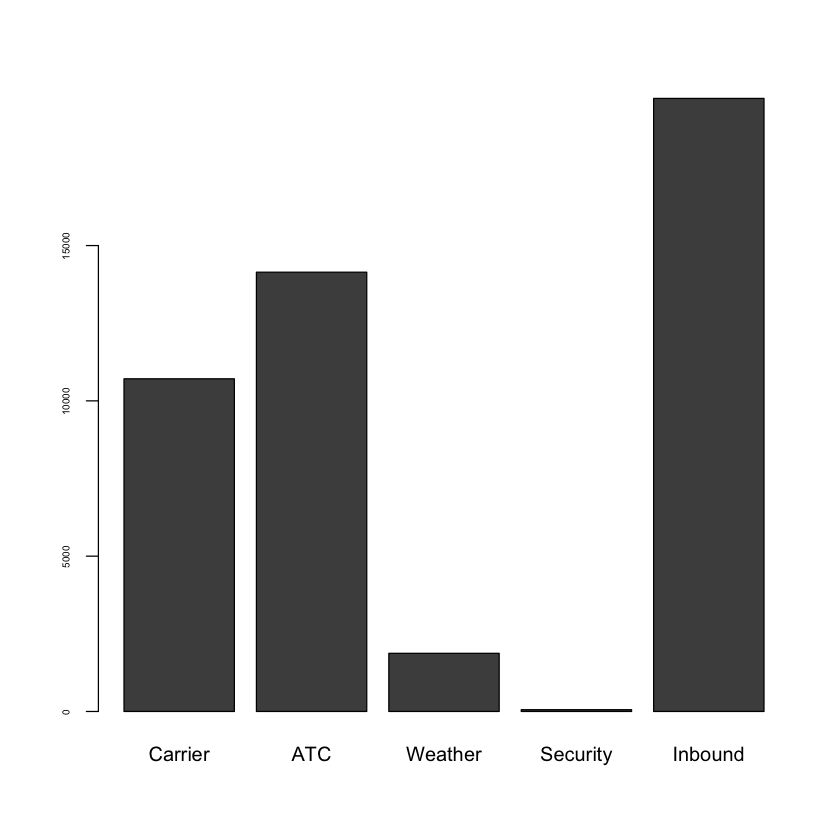

In [16]:
# Bar chart
barplot(as.matrix(dfw)/6, cex.axis=.5)

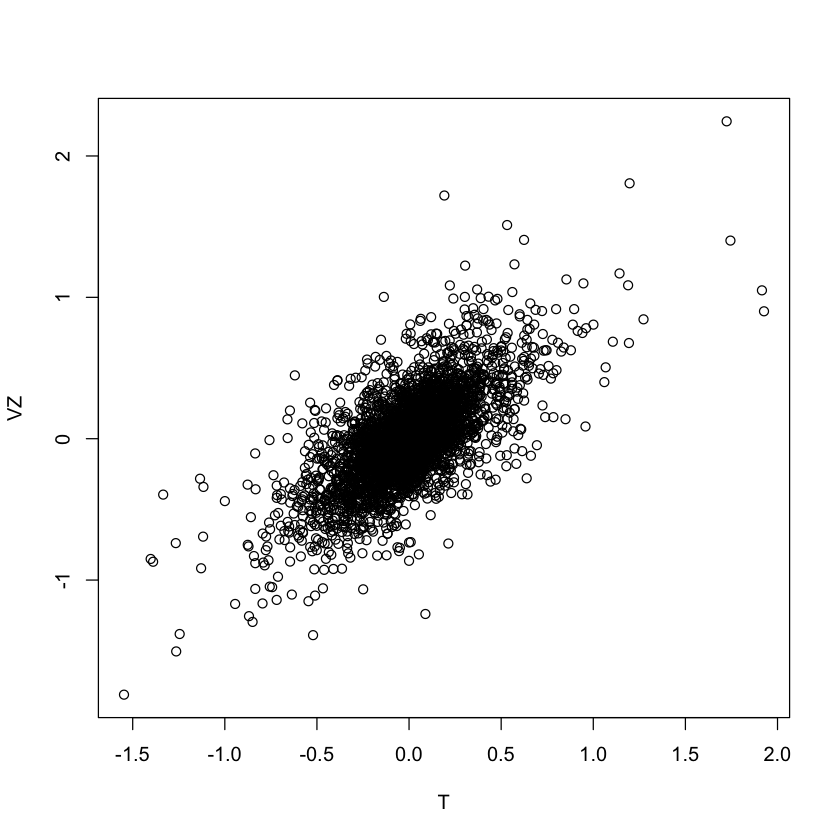

In [17]:
# Scatterplot
telecom <- sp500_px[, sp500_sym[sp500_sym$sector=="telecommunications_services", 'symbol']]
telecom <- telecom[row.names(telecom)>"2012-07-01", ]
plot(telecom$T, telecom$VZ, xlab="T", ylab="VZ")

In [18]:
kc_tax0 <- subset(kc_tax, TaxAssessedValue < 750000 & SqFtTotLiving>100 &
                  SqFtTotLiving<3500)
nrow(kc_tax0)

[1] 432693

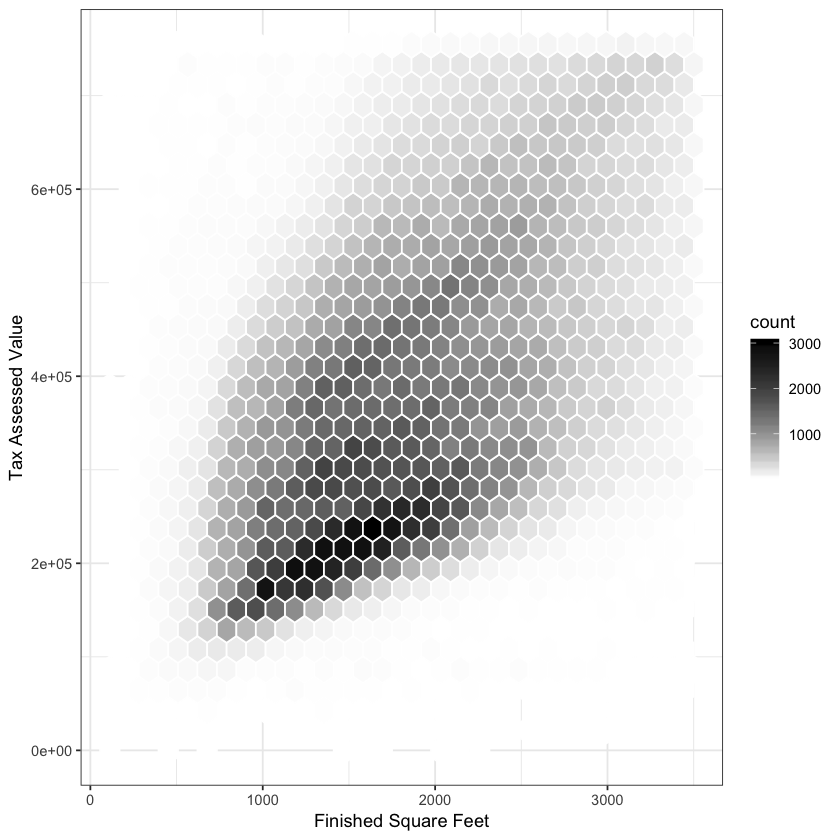

In [19]:
# install.packages('ggplot2')
# install.packages('hexbin')
library(ggplot2)

# Hexagonal binning
ggplot(kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))) + 
  stat_binhex(colour="white") + 
  theme_bw() + 
  scale_fill_gradient(low="white", high="black") +
  labs(x="Finished Square Feet", y="Tax Assessed Value")

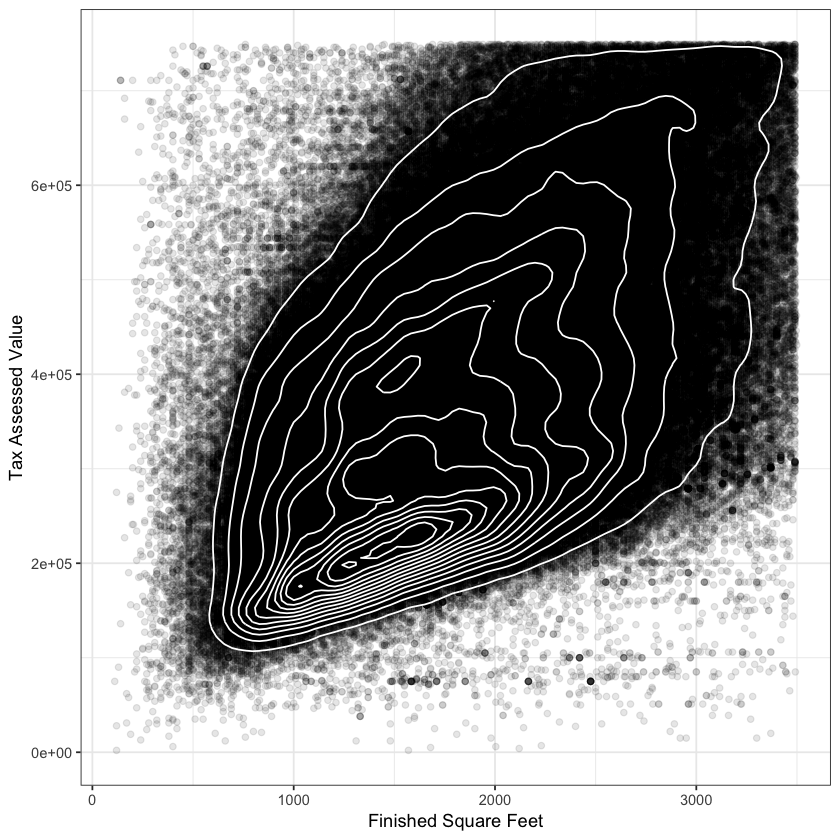

In [20]:
# Contour plot
ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
  theme_bw() + 
  geom_point( alpha=0.1) + 
  geom_density2d(colour="white") + 
  labs(x="Finished Square Feet", y="Tax Assessed Value")

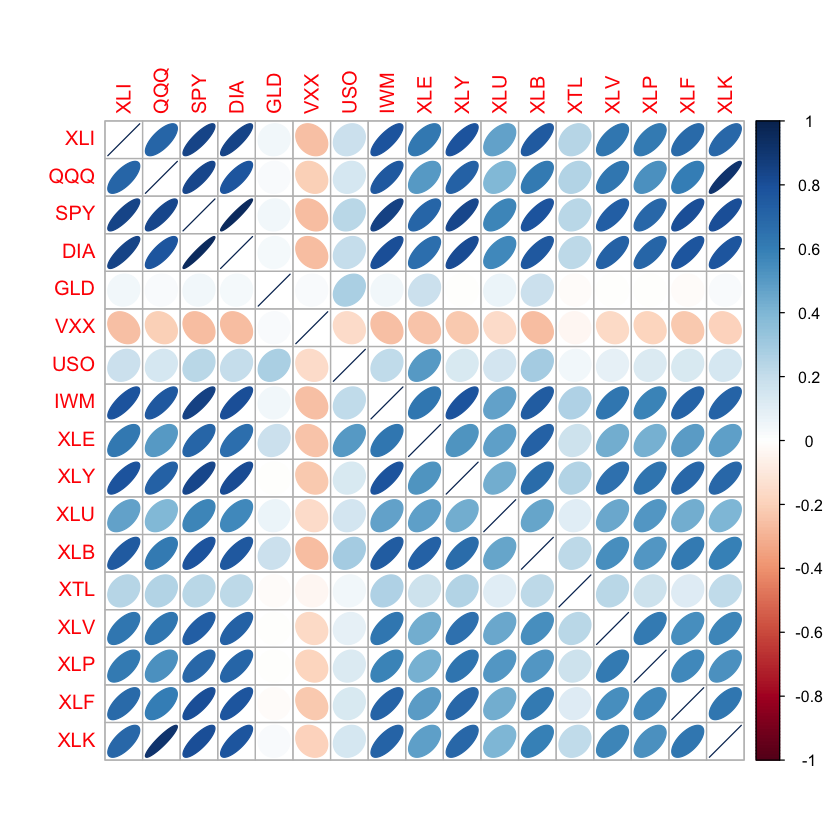

In [21]:
# install.packages('corrplot')
library(corrplot)
etfs <- sp500_px[row.names(sp500_px)>"2012-07-01", sp500_sym[sp500_sym$sector=="etf", 'symbol']]
corrplot(cor(etfs), method = "ellipse")

In [ ]:
# Part 2 - Categorical data

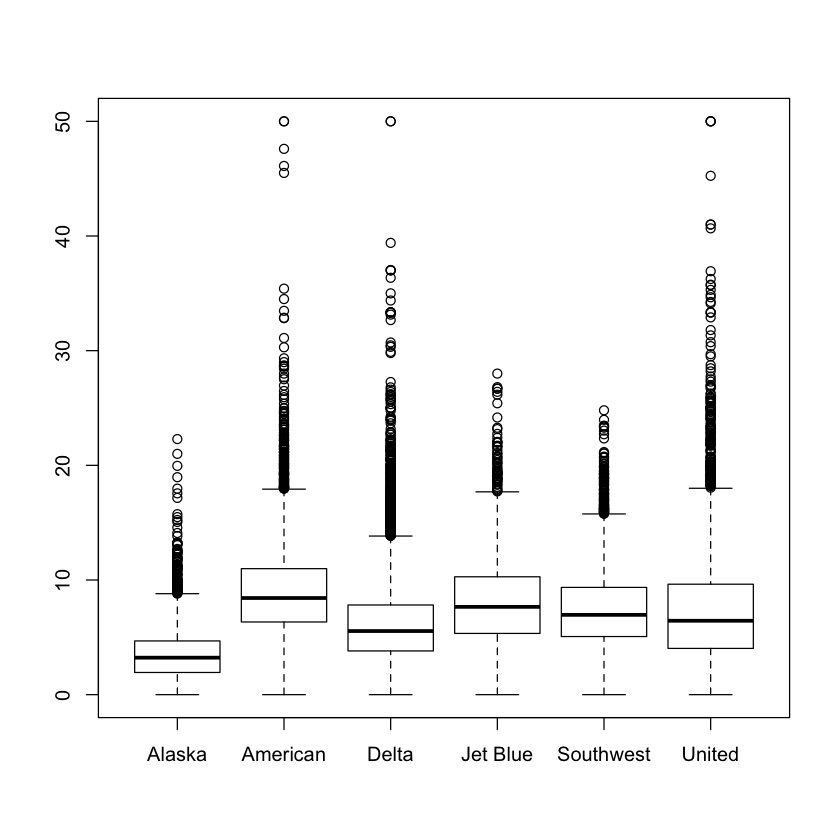

In [23]:
# Boxplot
boxplot(pct_carrier_delay ~ airline, data=airline_stats, ylim=c(0,50))

Warning message:
“Removed 38 rows containing non-finite values (stat_ydensity).”

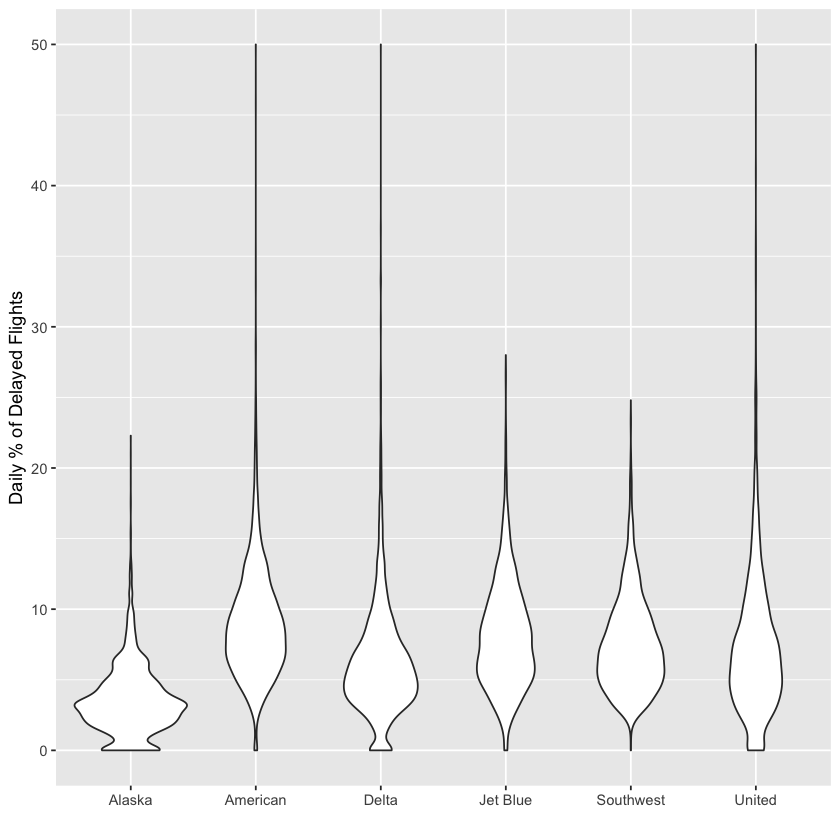

In [22]:
# Violin plot
library(ggplot2)
ggplot(data=airline_stats, aes(airline, pct_carrier_delay))  + 
  ylim(0, 50) + 
  geom_violin() +
  labs(x="", y="Daily % of Delayed Flights")

In [ ]:
# Part 3 - Visualizing multiple variables